In [ ]:
pip install fastai --upgrade

     |████████████████████████████████| 189 kB 10.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import fastai
from fastai.vision.all import * 

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_171.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_2.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_123.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_33.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_108.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_196.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_9.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]

In [ ]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_10.jpg')

In [ ]:
fname.name

'scottish_terrier_10.jpg'

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['scottish_terrier']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 splitter = RandomSplitter(seed = 42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460), 
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


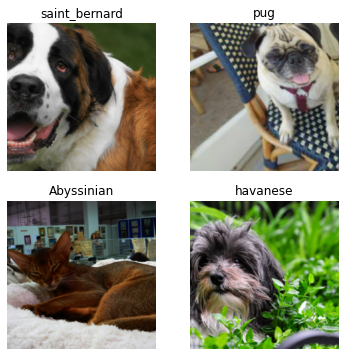

In [ ]:
dls.show_batch(max_n = 4)

In [ ]:
## using summary 

pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 splitter = RandomSplitter(seed = 42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460), 
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_34.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x334
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_34.jpg
    applying partial gives
      scottish_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(32)

Final sample: (PILImage mode=RGB size=500x334, TensorCategory(32))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Set

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.528959,0.355785,0.123139,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.512161,0.350722,0.112314,01:44
1,0.324775,0.255188,0.085927,01:44


In [ ]:
## get batch of one

x, y = dls.one_batch()

In [ ]:
y

TensorCategory([35, 13, 36, 33,  6, 35, 23, 17,  0, 21,  4, 33,  3,  2, 20, 28, 23,  8,
         4, 36, 24, 20,  4, 36, 18, 18,  3, 21,  5, 31, 26, 24, 34,  8, 24,  0,
        19, 16, 20,  4, 29, 26, 30, 21, 32, 15,  8,  6, 17, 22, 22, 22, 11,  2,
        18, 32, 11, 15,  3, 35, 17,  9, 25, 18], device='cuda:0')

In [ ]:
## get preds for this batch

preds, _ = learn.get_preds(dl = [(x, y)])

In [ ]:
print (preds[0])

print (preds[0].shape)

tensor([9.1501e-09, 5.6414e-09, 3.4984e-09, 9.1102e-10, 2.4485e-09, 8.4996e-10,
        8.4871e-10, 2.1050e-10, 2.3370e-09, 4.1206e-09, 3.4041e-09, 3.9148e-09,
        7.4539e-11, 4.2666e-10, 6.1087e-10, 7.7148e-09, 1.0242e-09, 1.9120e-10,
        8.3217e-08, 3.0329e-09, 8.2202e-10, 2.9344e-09, 1.9335e-08, 7.8605e-10,
        1.1079e-09, 2.4161e-07, 1.2324e-09, 1.5453e-09, 1.8144e-09, 7.5819e-09,
        1.2721e-08, 7.7256e-09, 2.5992e-07, 3.7022e-10, 1.6056e-10, 1.0000e+00,
        2.9062e-08])
torch.Size([37])


In [ ]:
preds[0].sum()

tensor(1.)

In [ ]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  


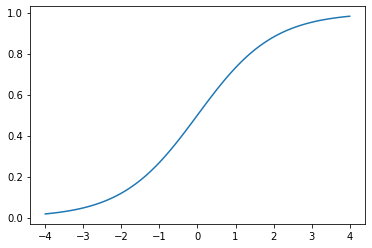

In [ ]:
plot_function(torch.sigmoid, min = -4, max = 4)

In [ ]:
acts = torch.randn((6, 2))*2

acts

tensor([[-1.8124,  2.2768],
        [ 3.4222, -0.2092],
        [-0.0323,  1.0524],
        [ 1.3932, -1.9006],
        [ 0.5434, -0.0917],
        [ 2.8121, -0.6384]])

In [ ]:
acts.sigmoid()

tensor([[0.1403, 0.9069],
        [0.9684, 0.4479],
        [0.4919, 0.7412],
        [0.8011, 0.1300],
        [0.6326, 0.4771],
        [0.9433, 0.3456]])

In [ ]:
(acts[:, 0] - acts[:, 1]).sigmoid()

tensor([0.0165, 0.9742, 0.2526, 0.9642, 0.6536, 0.9692])

In [ ]:
def softmax(x) :
  return exp(x) / exp(x).sum(dim = 1, keepdim = True)

In [ ]:
sm_acts = torch.softmax(acts, dim = 1)

sm_acts

tensor([[0.0165, 0.9835],
        [0.9742, 0.0258],
        [0.2526, 0.7474],
        [0.9642, 0.0358],
        [0.6536, 0.3464],
        [0.9692, 0.0308]])

In [ ]:
help(torch.where)

Help on built-in function where:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    .. note::
        Currently valid scalar and tensor combination are
        1. Scalar of floating dtype and torch.double
        2. Scalar of integral dtype and torch.long
        3. Scalar of complex dtype and torch.complex128
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:x is a scalar) or values selected at indices
                         

In [ ]:
targ = tensor([0, 1, 0, 1,1, 0])

In [ ]:
sm_acts

tensor([[0.0165, 0.9835],
        [0.9742, 0.0258],
        [0.2526, 0.7474],
        [0.9642, 0.0358],
        [0.6536, 0.3464],
        [0.9692, 0.0308]])

In [ ]:
idx = range(6)

sm_acts[idx, targ]

tensor([0.0165, 0.0258, 0.2526, 0.0358, 0.3464, 0.9692])

In [ ]:
-sm_acts[idx, targ]

tensor([-0.0165, -0.0258, -0.2526, -0.0358, -0.3464, -0.9692])

In [ ]:


F.nll_loss(sm_acts, targ, reduction = 'none')

tensor([-0.0165, -0.0258, -0.2526, -0.0358, -0.3464, -0.9692])

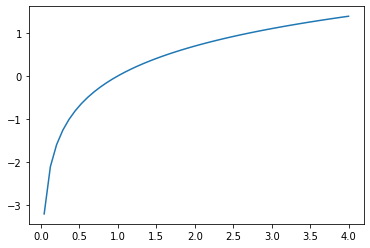

In [ ]:
plot_function(torch.log, min = -4, max = 4)

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
loss_func(acts, targ)

tensor(2.2602)

In [ ]:
F.cross_entropy(acts, targ)

tensor(2.2602)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

NameError: ignored

In [ ]:
interp.most_confused(min_val = 5)

[('Egyptian_Mau', 'Bengal', 9),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('beagle', 'basset_hound', 5),
 ('english_setter', 'english_cocker_spaniel', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

learn.fine_tune(1, base_lr = 0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.704908,4.858438,0.457375,01:43


epoch,train_loss,valid_loss,error_rate,time
0,3.374214,1.550993,0.448579,01:50


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

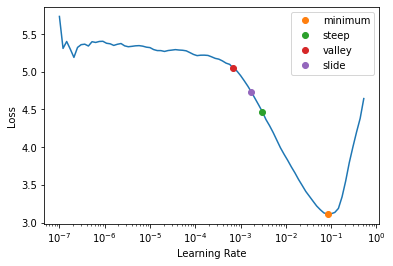

In [ ]:
learn = cnn_learner(dls, resnet34 , metrics = error_rate)

lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
lrs.minimum

0.00831763744354248

In [ ]:
print (f"Minimum/10 : {lrs.minimum:.2e}")

Minimum/10 : 8.32e-03


In [ ]:
lrs.minimum / 10

0.000831763744354248

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

learn.fine_tune(2, base_lr = lrs.minimum / 10)

epoch,train_loss,valid_loss,error_rate,time
0,2.158817,0.426757,0.133965,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.612436,0.248214,0.079161,01:40
1,0.413830,0.221645,0.071719,01:40


In [ ]:
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.callback.schedule:

fit_one_cycle(n_epoch, lr_max=None, div=25.0, div_final=100000.0, pct_start=0.25, wd=None, moms=None, cbs=None, reset_opt=False) method of fastai.learner.Learner instance
    Fit `self.model` for `n_epoch` using the 1cycle policy.



In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

learn.fit_one_cycle(3, lrs.minimum / 10 )

epoch,train_loss,valid_loss,error_rate,time
0,1.892490,0.333166,0.103518,01:33
1,0.737480,0.258549,0.085927,01:33
2,0.441203,0.221597,0.077131,01:33


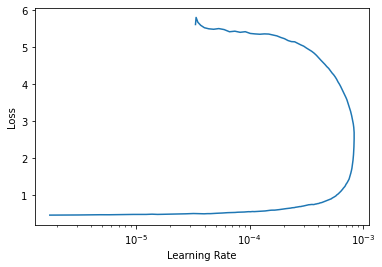

In [ ]:
learn.recorder.plot_lr_find()

In [ ]:
## unfreeze the model

learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

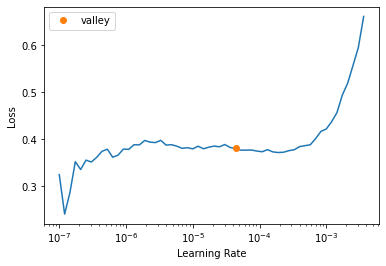

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max = 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.396315,0.218110,0.074425,01:40
1,0.380281,0.202681,0.072395,01:40
2,0.342585,0.200251,0.069689,01:40
3,0.303881,0.198622,0.073748,01:40
4,0.291790,0.195828,0.071042,01:40
5,0.291263,0.193459,0.071042,01:40


In [ ]:
## using discriminative learning rates

learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fit_one_cycle(3, lrs.minimum / 10)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.876984,0.335981,0.104871,01:34
1,0.716231,0.249219,0.083897,01:34
2,0.477823,0.234889,0.078484,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.398143,0.233116,0.077808,01:40
1,0.377039,0.220718,0.074425,01:40
2,0.338793,0.211179,0.071719,01:39
3,0.330325,0.192435,0.060217,01:39
4,0.286660,0.193686,0.062246,01:40
5,0.255848,0.186752,0.060893,01:40
6,0.236295,0.180016,0.058863,01:40
7,0.205984,0.182338,0.060217,01:40
8,0.208350,0.182099,0.058863,01:40
9,0.189337,0.180996,0.058863,01:40


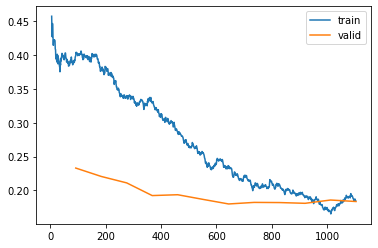

In [ ]:
learn.recorder.plot_loss()

In [ ]:
# increasing the training speed by using fp16

from fastai.callback.fp16 import *

In [ ]:
learn = cnn_learner(dls, resnet50, metrics = error_rate).to_fp16()

learn.fine_tune(6, freeze_epochs= 3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.276330,0.276971,0.089986,02:12
1,0.587505,0.301022,0.098106,02:06
2,0.413657,0.258995,0.085250,02:06


epoch,train_loss,valid_loss,error_rate,time
0,0.279511,0.228806,0.072395,02:42
1,0.305523,0.293492,0.082544,02:40
2,0.248281,0.312081,0.093369,02:39
3,0.158853,0.247771,0.076455,02:39
4,0.081181,0.190621,0.060893,02:40
5,0.056340,0.188202,0.056834,02:39
